Link GSheet: https://docs.google.com/spreadsheets/d/1kd0Cp-aH18CEiuzydak3Q7UKzEp1_935fbygBj-6Jws/edit#gid=0  
Link Kaggle: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists  
Link GDocs: https://docs.google.com/document/d/1-djI-f_ehD-We0fQsHsMiOMuIDLytaW45CChPzbC3MM/edit

In [360]:
# Library

# Basic Statistic
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Statistics
from scipy.stats import normaltest

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, precision_recall_curve,average_precision_score,plot_precision_recall_curve

# Feature Selection
from sklearn.feature_selection import RFE
from sklearn.metrics import matthews_corrcoef

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Problem Statement

**Context**  
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

0 : Not looking for job change  
1 : Looking for a job change

**1. Background Problem :**

Company want to increase recruitment efficiency based on training

**2. Problem Statement for Machine Learning :**

Company wants to know which candidates are really wants to work for the company based on company training to be hired as data scientists

**3. Action :**

Focusing the recruitment for people who are selected by model ML and suitable with criteria based on analysis

**4. Value / Goals :**

Reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates.

**Metric Evaluation**

Type 1 error : False Positive  
Model predicts that candidate is looking for a job change while actually not  
Consequences: loss of recruitment cost, time and resource

Type 2 error : False Negative  
Model predicts that candidate is not looking for a job change while actually he/she is  
Consequences: loss of potential candidate  

# Data Understanding

In [361]:
#Load Dataset
df = pd.read_csv("aug_train.csv")
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


***
* enrollee_id : Unique ID for candidate [numeric]
* city: City code (unknown) [categorical]
* city_ development _index (CDI): Developement index of the city (scaled). Ranks cities according to their Infrastructure, Waste Management, Health, Education, and City Product [numeric]
* gender: Gender of candidate [categorical]
* relevent_experience: Relevant experience of candidate [categorical ordinal]
* enrolled_university: Type of University course enrolled if any [categorical]
* education_level: Education level of candidate [categorical ordinal]
* major_discipline :Education major discipline of candidate [categorical]
* experience: Candidate total experience in years [categorical ordinal]
* company_size: No of employees in current employer's company [categorical ordinal]
* company_type : Type of current employer [categorical]
* lastnewjob: Difference in years between previous job and current job [categorical ordinal]
* training_hours: training hours completed [numeric]
* target: Candidates who decide looking for a job change or not [categorical]

In [362]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

This dataset have more catagorical data then numerical data

# Exploratory Data Analysis (EDA)

In [363]:
# Describing non Numerical Data
df.describe(include=object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [364]:
# Describing Numerical Data
df.describe().drop(columns=['enrollee_id','target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


* In `city_development_index` (CDI), the mean values is 0.828, median 0.903 and std 0.123. It means that most of the candidates are from well-developed cities.
* In `training_hours` , the mean values is 65.367, median 47 and max 336. It means that most of the candidates training hours are low but there are some candidates do spend much time to did training .

## Overall Data Value Counts

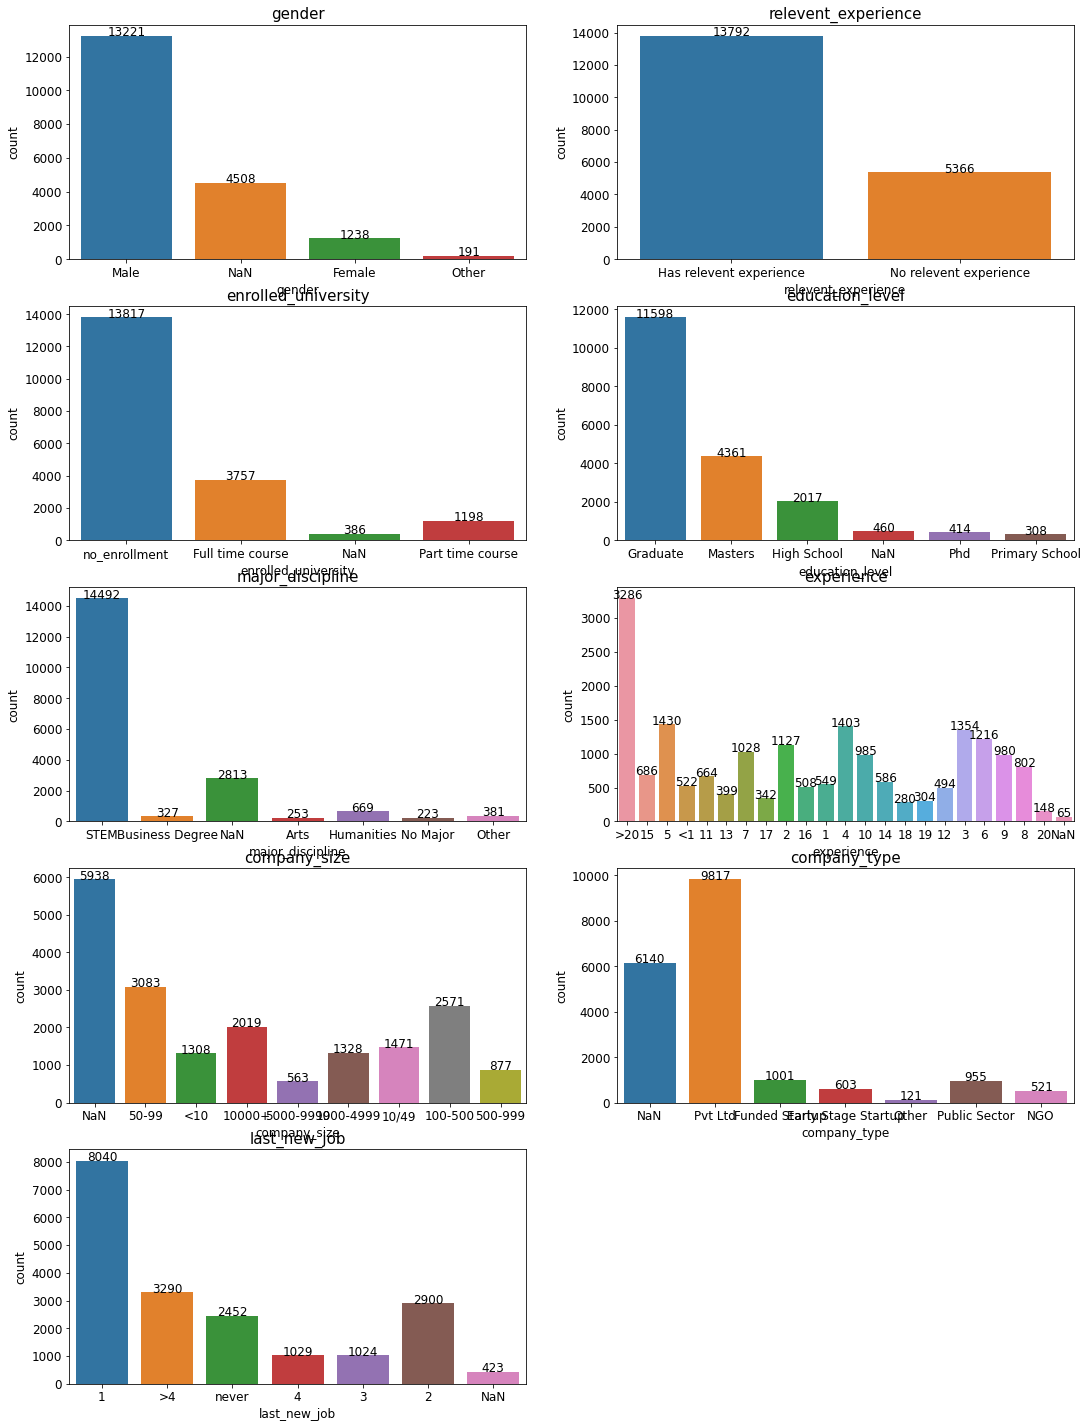

In [365]:
# Visualize data values
plt.figure(figsize=(18,25))
column_list = list(df.columns.values) [3:12]
A = 0
for i in column_list:
    A+=1
    plt.subplot(5,2,A)
    ax = sns.countplot(data=df.fillna('NaN'), x=i)
    plt.title(i, fontsize=15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=12)

## Data Distribution

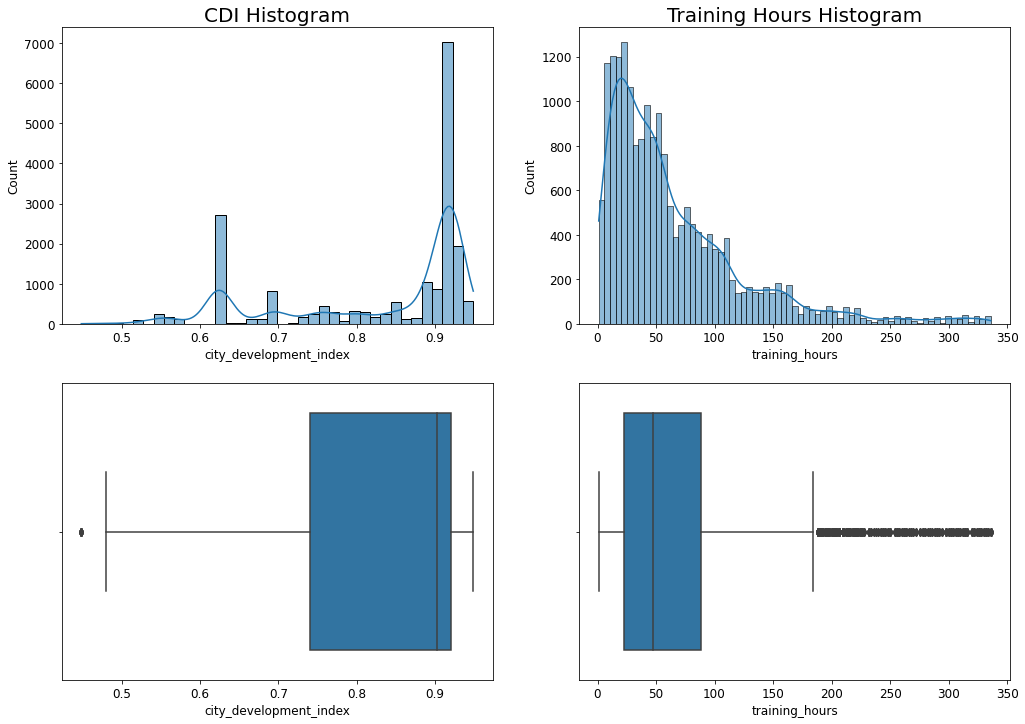

In [366]:
# Distribution of numerical data
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(df['city_development_index'],kde=True)
plt.title('CDI Histogram',fontsize=20)

plt.subplot(222)
sns.histplot(df['training_hours'],kde=True)
plt.title('Training Hours Histogram',fontsize=20)

plt.subplot(223)
sns.boxplot(df['city_development_index'])

plt.subplot(224)
sns.boxplot(df['training_hours'])

plt.show()

In [367]:
# Distribution normality test
numerical_feature = ['city_development_index','training_hours']

for i in numerical_feature:
    stats, pval = normaltest(df[i])
    if pval > 0.05:
        print(i, ': Normal distribution')
    else:
        print(i, ': Not normal distribution')

city_development_index : Not normal distribution
training_hours : Not normal distribution


* `city_development_index` and `training_hours` data are not following normal distribution. For numerical analysis we will use non parametric method
* `training_hours` has right skewed. It is normal because people are usually excited when doing training at the beginning but stop when they get bored. 

## Data Correlation

### Spearman Correlation 

In [368]:
df[["city_development_index","training_hours","target"]].corr(method="spearman")

,city_development_index,training_hours,target
city_development_index,1.000000,0.007491,-0.279165
training_hours,0.007491,1.000000,-0.014126
target,-0.279165,-0.014126,1.000000


There are no correlation from `city_development_index`, `training_hours`, and `target`. `trainning_hours` have some outliers that affect the correlation values. We can analyze characteristic outliers and find the relation with our target

### Weight of Evidence (WOE) and Information Value (IV)
    This dataset contain more data with catagorical type than numerical type. Therefore we chose to do IV instead of correlation to know how impactfull the feature to target.
    
    Source: https://towardsdatascience.com/model-or-do-you-mean-weight-of-evidence-woe-and-information-value-iv-331499f6fc2#:~:text=Specifically%2C%20when%20it%20comes%20to%20classification%20problems%2C%20WoE,which%20is%20based%20on%20them%20defaulting%20credit%20repayment.

    Information value, Predictive power
    < 0.02, useless for prediction
    0.02 - 0.1, weak predictor
    0.1 - 0.3, medium predictor
    0.3 - 0.5, strong predictor
    > 0.5, suspicious or too good

In [369]:
for i in df.drop(columns=['target','enrollee_id','city','city_development_index','training_hours']).columns:
    df_woe_iv = (pd.crosstab(df[i],df['target'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv=lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    print(df_woe_iv,'\n------------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------------
target                0.0   

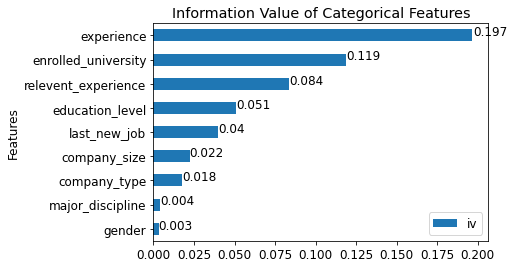

In [370]:
columns_cat = df.drop(columns=['target','enrollee_id','city','city_development_index','training_hours']).columns
iv = []
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i],df['target'], normalize='columns')
                 .assign(woe=lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv=lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])
    #     print(df_woe_iv,'\n-------------------------------------------------------')

df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by='iv')
df_iv.plot(kind='barh', title='Information Value of Categorical Features')
for index, value in enumerate(list(round(abc["iv"],3))):
    plt.text((value), index,
             str(value))
plt.legend(loc="lower right")
plt.show()

From the graph above, we can see the order of features based on its predictive power towards target.

Exeperience give the most impact and gender give the less impact. From this analysis we consider to drop feature gender because gender can lead to discriminatory outcomes.

## Identify Missing Values

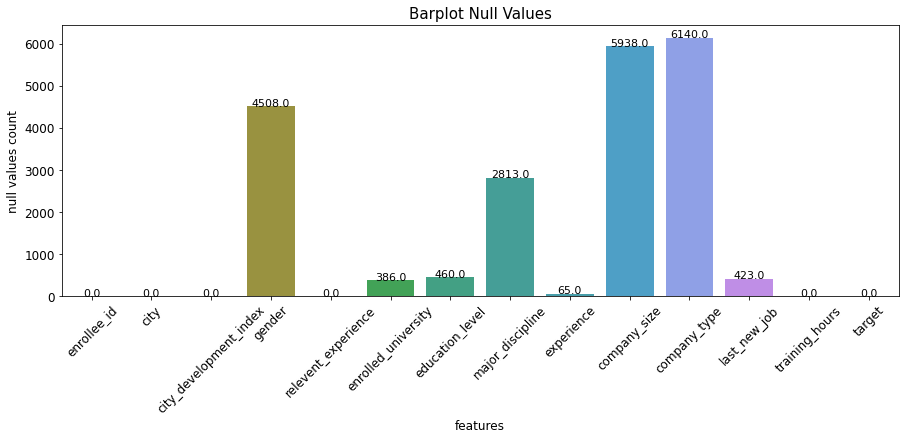

In [371]:
# Missing value percentage per column
null_df = df.isna().sum().reset_index()

ax = plt.figure(figsize=(15,5))

ax = sns.barplot(null_df['index'], null_df[0], palette='husl')
plt.xlabel('features', fontsize=12)
plt.ylabel('null values count', fontsize=12)
plt.xticks(rotation=45)
plt.title("Barplot Null Values",fontsize=15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha='center', color='black', size=11)

plt.show()

This dataset have missing values in columns `gender`, `enrolled_university`, `education_level`, `major_discipline`, `experience`, `company_size`, `company_type`, and `last_new_job`

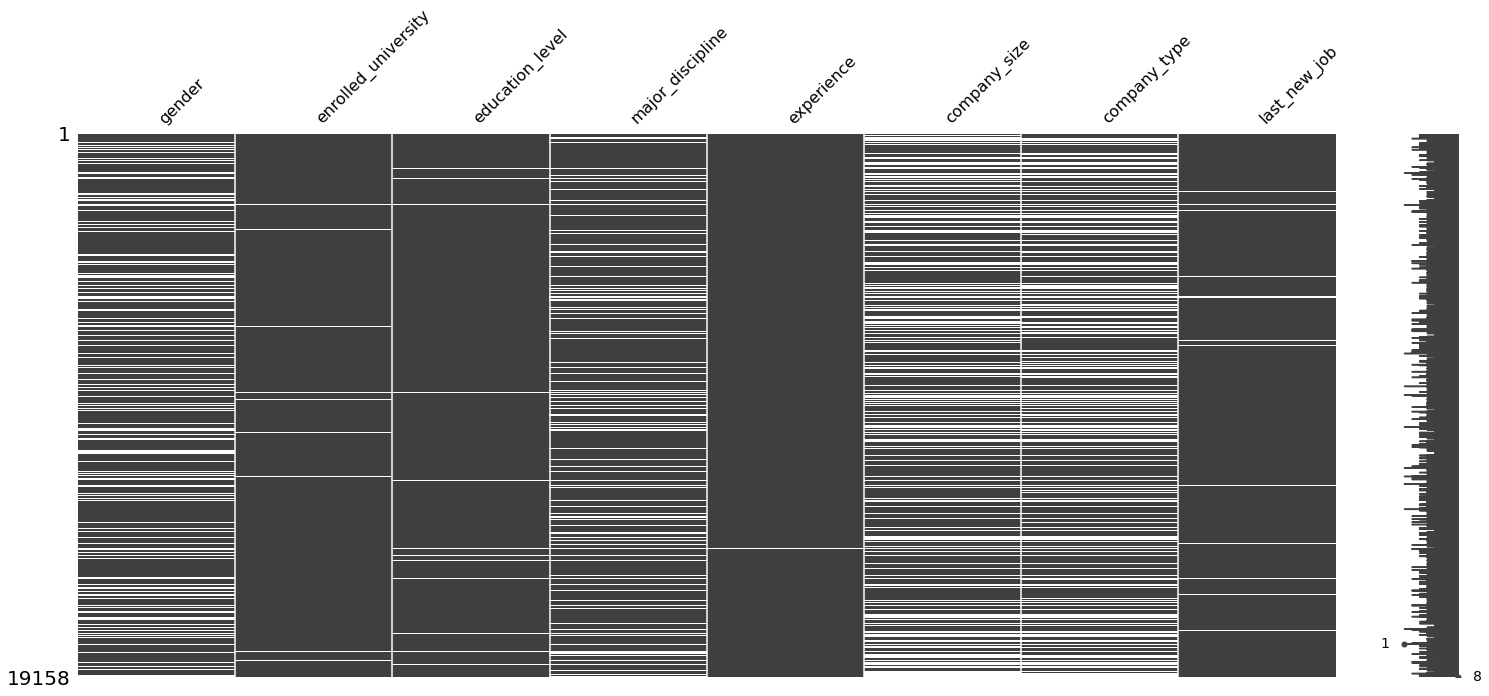

In [372]:
# Generate preview of entries with null values
df_nan = pd.DataFrame(df.isna().sum())

if df.isna().any(axis=None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

Missing values each columns have random pattern

## Identify Duplicate Data

In [373]:
# Check any duplicate data
dup_res = df['enrollee_id'].duplicated().sum()
print(f"This dataset has/have {dup_res} duplicate/s data")

This dataset has/have 0 duplicate/s data


## Identify Data Imbalance

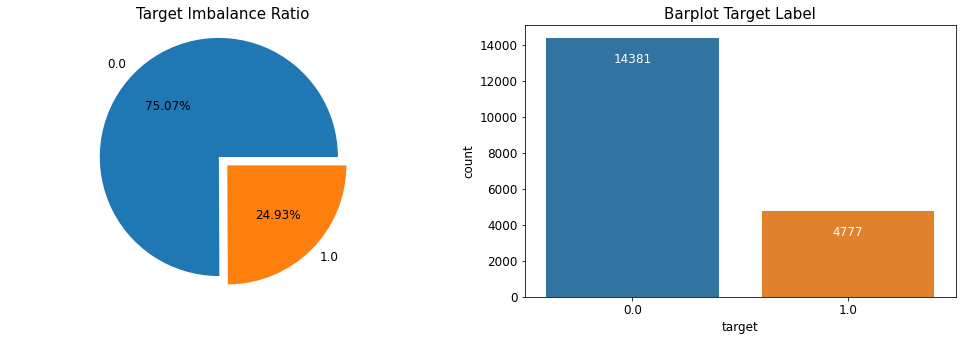

In [374]:
plt.figure(figsize=(17,(100)/20))

plt.subplot(121)
plt.pie(round(df['target'].value_counts()/len(df)*100,2),labels=list(df['target'].value_counts().index),autopct = "%.2f%%",explode = (0,0.1))
plt.axis("equal")
plt.title("Target Imbalance Ratio",size=15)

plt.subplot(122)
ax = sns.countplot(data=df, x='target')
plt.title("Barplot Target Label", fontsize=15)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=12)

Proportion of target is imbalance

# Data Analytics

## Outliers in training_hours Analysis

In [375]:
data = df["training_hours"].describe()
IQR = data[6] - data[4]
Low = data[4] - (IQR*1.5)
Upp = data[6] + (IQR*1.5)
sum_out = (df["training_hours"]>Upp).sum() + (df["training_hours"]<Low).sum()
print(f"This dataset has/have {sum_out} outlier/s data")

This dataset has/have 984 outlier/s data


In [376]:
outliers = df[(df["training_hours"]>Upp)]
outliers #Semua outliers berada diatas batas atas

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
35,4866,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,10,10/49,Early Stage Startup,2,206,0.0
69,4830,city_90,0.698,NaN,No relevent experience,NaN,NaN,NaN,2,NaN,Pvt Ltd,never,228,1.0
89,32401,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,6,100-500,NaN,1,332,0.0
110,4789,city_67,0.855,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,50-99,Pvt Ltd,1,210,0.0
119,14199,city_160,0.920,Male,Has relevent experience,Part time course,Graduate,Business Degree,10,50-99,Funded Startup,1,260,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19100,16368,city_65,0.802,NaN,No relevent experience,no_enrollment,NaN,NaN,4,NaN,NaN,2,304,0.0
19107,15133,city_160,0.920,Male,No relevent experience,Part time course,Graduate,STEM,3,NaN,NaN,1,322,1.0
19117,3458,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,NaN,NaN,>4,214,0.0
19118,12211,city_126,0.479,NaN,No relevent experience,no_enrollment,NaN,NaN,1,NaN,NaN,never,316,1.0


This dataframe contains outliers above mean, we want to know if the outliers spend much traning hours to change the job or not

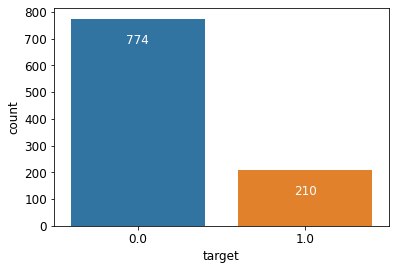

In [377]:
ax = sns.countplot(data=outliers,x="target")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=12)

Candidate who spend so much time (outlier) and want to change job is less than candidate who spend so much time (outlier) and dont want to change job.

## Independent Test with Chi-squared


In [378]:
from scipy.stats import chi2_contingency

In [379]:
object_list = list(df.select_dtypes(include=object).columns)
for i in object_list:
    chisqt = pd.crosstab(df["target"], df[i], margins=True)
    value = np.array([chisqt.iloc[0],
                      chisqt.iloc[1]])
    stat,pval,dof,exp = chi2_contingency(value)
    alpha = 0.05
    if pval <= alpha:
        print(i, ": Dependent (reject H0)")
    else:
        print(i, ": Independent (H0 holds true)")

city : Dependent (reject H0)
gender : Dependent (reject H0)
relevent_experience : Dependent (reject H0)
enrolled_university : Dependent (reject H0)
education_level : Dependent (reject H0)
major_discipline : Independent (H0 holds true)
experience : Dependent (reject H0)
company_size : Dependent (reject H0)
company_type : Dependent (reject H0)
last_new_job : Dependent (reject H0)


`major_discipline` the only one that has independent result to the target. That mean independent has less affect to the target and it has same result with IV

## Data proportion

### Data propotion based on target

In [380]:

# df['city_development_index range'] = pd.cut(df['city_development_index'],7)
# df['training_hours range'] = pd.cut(df['training_hours'],7)

In [381]:
# # Proportion of ordinal data
# count = 0
# fig = plt.figure(figsize=(20,20))

# for i in df.drop(columns='target').columns:
#       count +=1
#       ax= plt.subplot(4,3,count)
#       pd.crosstab(df[i],df['target'], normalize=0).plot(kind='bar',stacked=True,ax=ax)
#       fig.tight_layout()

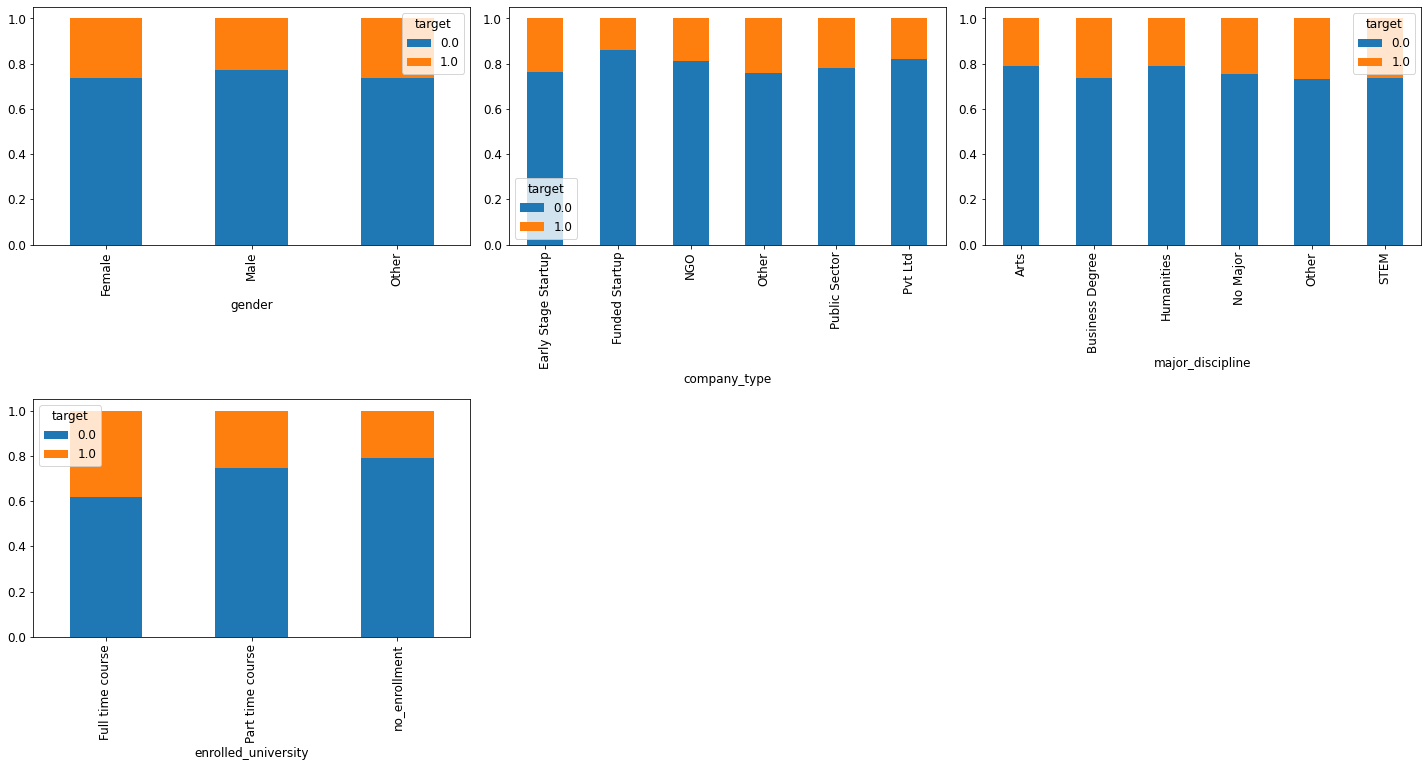

In [382]:
# Proportion of nominal data
count = 0
fig = plt.figure(figsize=(20,20))

for i in df[['gender','company_type','major_discipline','enrolled_university']].columns:
      count +=1
      ax= plt.subplot(4,3,count)
      pd.crosstab(df[i],df['target'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
      fig.tight_layout()


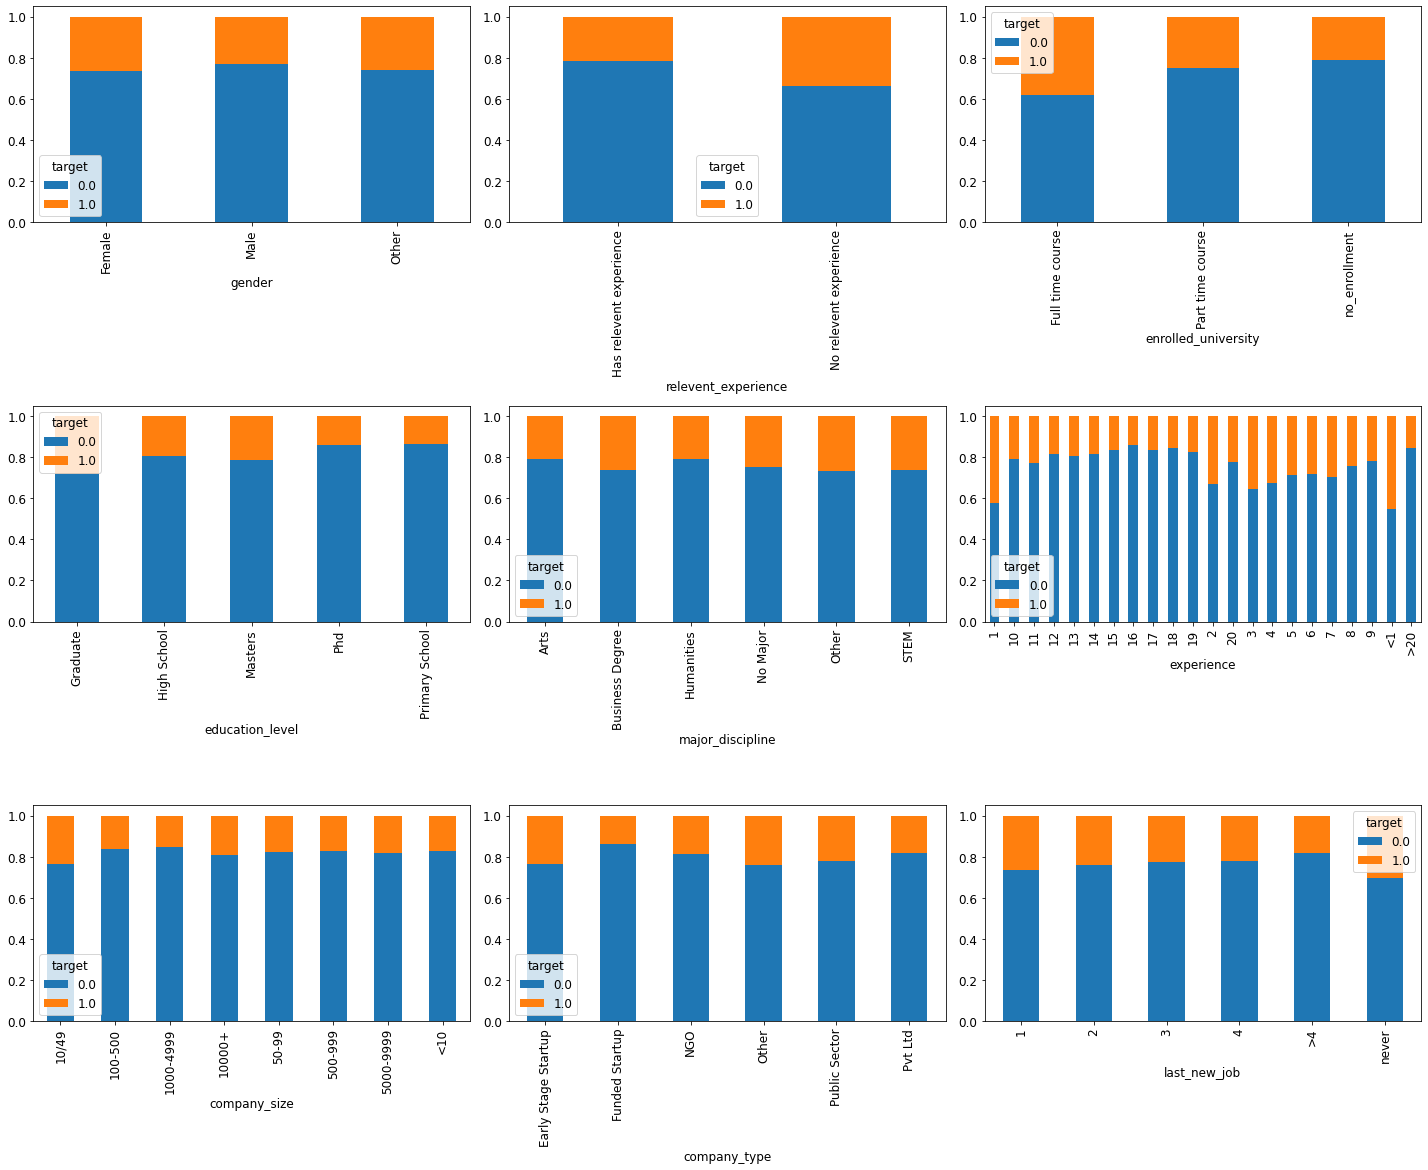

In [383]:
# Proportion of target in features
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['target','enrollee_id','city','city_development_index','training_hours']).columns:
      count +=1
      ax= plt.subplot(4,3,count)
      pd.crosstab(df[i],df['target'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
      fig.tight_layout()

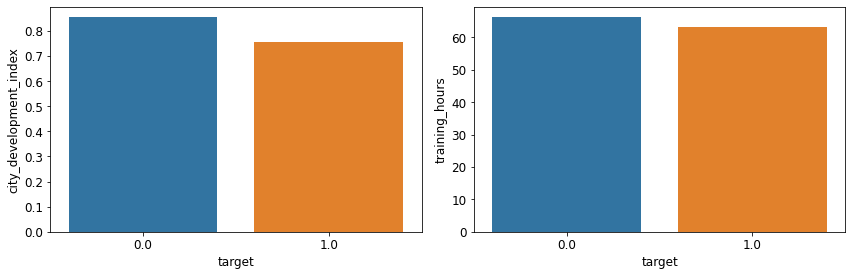

In [384]:
count = 0
fig = plt.figure(figsize=(12,4))

for i in df[['city_development_index','training_hours']].columns:
    count +=1
    ax= plt.subplot(1,2,count)
    sns.barplot(data=df, x='target', y=i, ci=None, estimator=np.mean)
    fig.tight_layout()

From the graph above we can see that in every feature, there is more candidates that are not looking for a job change (`target` 0) than those who are looking for a job change (`target` 1)

In [385]:
# Graphic Objects Plotly (Stacked Bar Chart)
df_target_0 = df[df['target']==0].groupby('city')['enrollee_id'].count().sort_values(ascending=False).reset_index().head()
df_target_1 = df[df['target']==1].groupby('city')['enrollee_id'].count().sort_values(ascending=False).reset_index().head()

fig=go.Figure()
#create first plot
fig.add_trace(go.Bar(x= df_target_1['city'],
                    y= df_target_1['enrollee_id'],
                    orientation='v',
                    name='Class 1',
                    hoverinfo='all'))

#create second plot
fig.add_trace(go.Bar(x= df_target_0['city'],
                    y= df_target_0['enrollee_id'],
                    orientation='v',
                    name='Class 0',
                    hoverinfo='all'))
fig.update_layout(barmode='stack', width=800, height=400, title='Top 5 Cities')
fig.show()

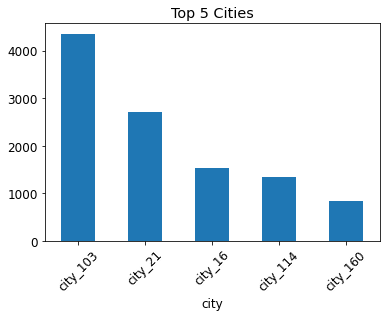

In [386]:
df.groupby(['city'])['enrollee_id'].count().sort_values(ascending=False).head().plot(kind='bar')
plt.title("Top 5 Cities")
plt.xticks(rotation=45)
plt.show()

From the data exploration, we can see that:
* Top 5 `city` where the candidates come from are city_103, city_21, city_16, city_114, city_160, in which city_21 has more class 1 candidates than city_103

<AxesSubplot:xlabel='major_discipline,education_level'>

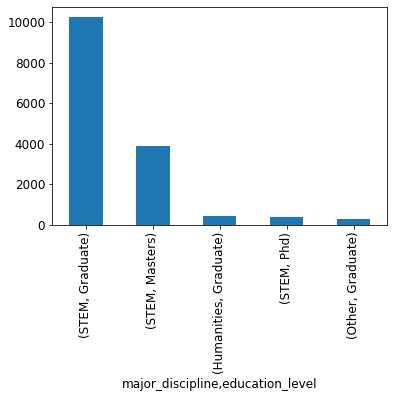

In [387]:
# Showing the candidates' education background
df.groupby(['major_discipline'])['education_level'].value_counts(dropna=False).sort_values(ascending=False).head().plot(kind='bar')

From the bar graph above we can see that most of the candidates took STEM `major_discipline` at Graduate and Master `education_level`. This information can be used for HR Recruitment department to target talents for data science in the future.

# Preprocessing

## Fill Missing Values

First we try to find the missing values based on ohter features

### Major discipline

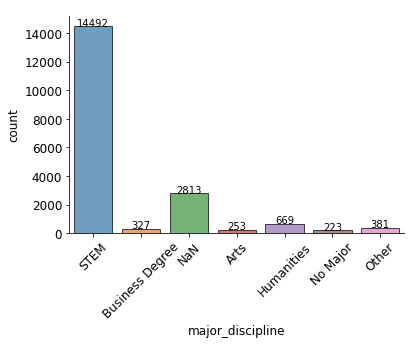

In [388]:
sns.countplot(data=df.fillna('NaN'), x='major_discipline', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=10)
plt.show()

In [389]:
# Evaluate No Major in major_discipline
df[df['major_discipline']=='No Major']['education_level'].value_counts(dropna=False)

Graduate    194
Masters      29
Name: education_level, dtype: int64

Candidates who entry `major_discipline` as `No Major` are those who acquired `Graduate` and `Masters` `education_level`. We assume their major is not on the list. Thus, we will change their `major_discipline` to `Other`major.

In [390]:
nan_index = (df[(df['major_discipline']=='No Major') & ((df['education_level']=='Graduate') | (df['education_level']=='Masters'))]).index
df['major_discipline'][nan_index]='Other'

In [391]:
df['major_discipline'].value_counts(dropna=False)

STEM               14492
NaN                 2813
Humanities           669
Other                604
Business Degree      327
Arts                 253
Name: major_discipline, dtype: int64

`No Major` has been successfully changed to `Other`

In [392]:
# Missing values of major discipline
print('Current missing value:', df['major_discipline'].isna().sum())
df[df['major_discipline'].isna()]['education_level'].value_counts(dropna=False)

Current missing value: 2813


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

All of candidate with `high school` and `primary school` `education_level` entry `NaN` values for `major_discipline`, thus we will fill their `major_discipline` to `No major`

In [393]:
nan_index=(df[(df['major_discipline'].isna()) & ((df['education_level']=='High School') | (df['education_level']=='Primary School'))]).index
df['major_discipline'][nan_index]='No Major'

In [394]:
df['major_discipline'].value_counts(dropna=False)

STEM               14492
No Major            2325
Humanities           669
Other                604
NaN                  488
Business Degree      327
Arts                 253
Name: major_discipline, dtype: int64

`high school` and `primary school` graduates successfully changed to `No Major`

In [395]:
# The implication of education level to major discipline entry
print('Current missing value:', df['major_discipline'].isna().sum())
df[df['major_discipline'].isna()]['education_level'].value_counts(dropna=False)

Current missing value: 488


NaN         460
Graduate     22
Masters       6
Name: education_level, dtype: int64

From 488 NaN values in `major_discipline`, 460 of them has `NaN` values in `education_level`. We assume that these candidates do not have formal education. Thus, we will consider their `major_discipline` as `No Major` too.  
The rest 28 has `Graduate` and `Masters` `education_level`. We assume that the candidates' major was not on the list, so we will consider their `major_discipline` to `Other`.

In [396]:
nan_index=(df[(df['major_discipline'].isna()) & (df['education_level'].isna())]).index
df['major_discipline'][nan_index]='No Major'

In [397]:
nan_index=(df[(df['major_discipline'].isna()) & ((df['education_level']=='Graduate') | (df['education_level']=='Masters'))]).index
df['major_discipline'][nan_index]='Other'

In [398]:
print('Current missing value:', df['major_discipline'].isna().sum())
df['major_discipline'].value_counts(dropna=False)

Current missing value: 0


STEM               14492
No Major            2785
Humanities           669
Other                632
Business Degree      327
Arts                 253
Name: major_discipline, dtype: int64

`NaN` `major_discipline` entry successfully filled.  

### Education level

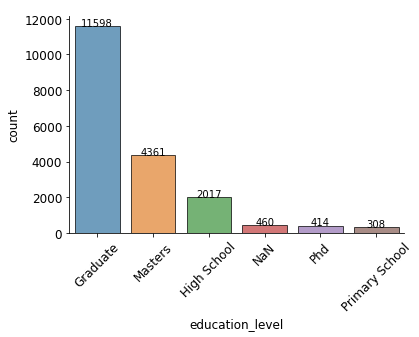

In [399]:
sns.countplot(data=df.fillna('NaN'), x='education_level', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks(rotation=45)
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=10)
plt.show()

As processed in `major_discipline`, initially all `NaN` values in `education_level` also has `NaN` values in `major_discipline`. So it belongs to those who don't have formal education. Thus, we will change the label as `No Education`.

In [400]:
print('Current missing value:', df['education_level'].isna().sum())
df['education_level'] = df['education_level'].fillna('No Education')
df['education_level'].value_counts(dropna=False)

Current missing value: 460


Graduate          11598
Masters            4361
High School        2017
No Education        460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

`NaN` values successfully changed to `No Education`

### Enrolled University

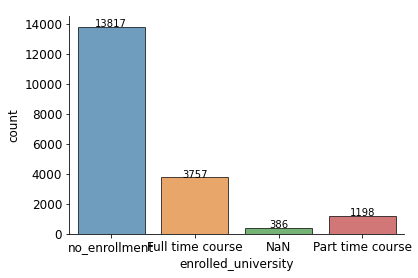

In [401]:
sns.countplot(data=df.fillna('NaN'), x='enrolled_university', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=10)
plt.show()

In [402]:
df[df['enrolled_university'].isna()]['education_level'].value_counts(dropna=False)

Graduate          171
No Education      100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

Candidate who has `No Education` and `Primary School` `education_level` are not qualified to enroll university. So we will fill their `NaN` entry in `enrolled_university` to `no_enrollment`.

In [403]:
nan_index=(df[(df['enrolled_university'].isna()) & ((df['education_level']=='No Education')|(df['education_level']=='Primary School'))]).index
df['enrolled_university'][nan_index]='no_enrollment'

In [404]:
print('Current missing value:', df['enrolled_university'].isna().sum())
df[df['enrolled_university'].isna()]['education_level'].value_counts(dropna=False)

Current missing value: 277


Graduate       171
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

`No Education` and `Primary School` candidate successfully changed to `no_enrollment`.

### Company Size/Company Type

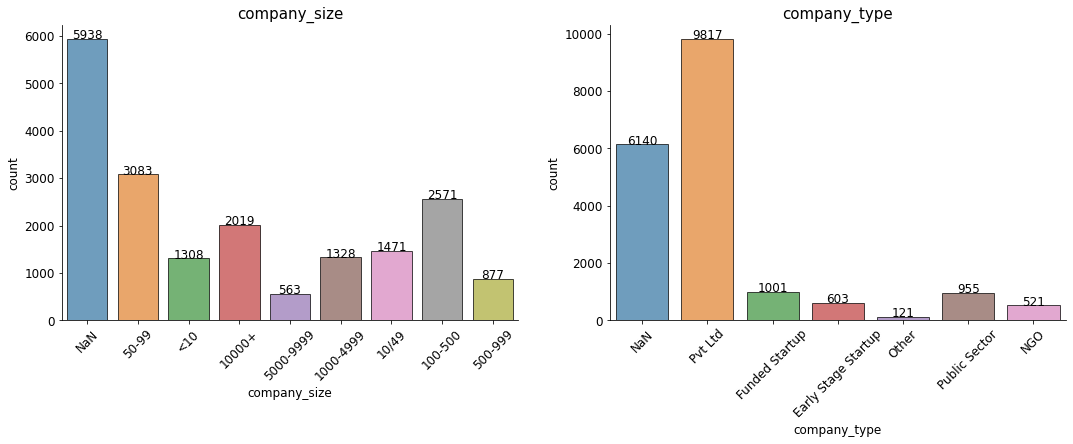

In [405]:
plt.figure(figsize=(18,25))
column_list = ['company_size','company_type']
A = 0
for i in column_list:
    A+=1
    plt.subplot(4,2,A)
    ax = sns.countplot(data=df.fillna('NaN'), x=i, alpha=0.7, edgecolor='black')
    sns.despine()
    plt.title(i, fontsize=15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=12)
    if A >=0:
        plt.xticks(rotation=45)

In [406]:
df['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [407]:
df[(df['company_size'].isna()) & (df['company_type'].isna())]['enrolled_university'].value_counts(dropna=False)

no_enrollment       3102
Full time course    1846
Part time course     288
NaN                  124
Name: enrolled_university, dtype: int64

Candidates enrolling `Full time course` in `enrolled_university` are not likely to work for a company. So we will set their `NaN`entry in `company_size` and `company_type` to `No Employment`.

In [408]:
nan_index=(df[(df['company_size'].isna()) & (df['company_type'].isna()) & (df['enrolled_university']=='Full time course')]).index
df['company_size'][nan_index]='No Employment'
df['company_type'][nan_index]='No Employment'

In [409]:
print('Current missing value company_size:', df['company_size'].isna().sum())
print('Current missing value company_type:', df['company_type'].isna().sum())
df[(df['company_size'].isna()) & (df['company_type'].isna())]['enrolled_university'].value_counts(dropna=False)

Current missing value company_size: 4092
Current missing value company_type: 4294


no_enrollment       3102
Part time course     288
NaN                  124
Name: enrolled_university, dtype: int64

`Full time course` candidate successfully changed to `No Employment`.

In [410]:
df[(df['company_size'].isna()) | (df['company_type'].isna())]['enrolled_university'].value_counts(dropna=False)

no_enrollment       3956
Full time course     380
Part time course     376
NaN                  160
Name: enrolled_university, dtype: int64

Some candidates enrolling `Full time course` in `enrolled_university` entry `NaN` values either in `company_size` or `company_type`. We assume that they are not likely to work for a company too, so we will fill the missing value with `No Employment`.

In [411]:
nan_index=(df[((df['company_size'].isna()) | (df['company_type'].isna())) & (df['enrolled_university']=='Full time course')]).index
df['company_size'][nan_index]='No Employment'
df['company_type'][nan_index]='No Employment'

In [412]:
print('Current missing value company_size:', df['company_size'].isna().sum())
print('Current missing value company_type:', df['company_type'].isna().sum())
df[(df['company_size'].isna()) | (df['company_type'].isna())]['enrolled_university'].value_counts(dropna=False)

Current missing value company_size: 3859
Current missing value company_type: 4147


no_enrollment       3956
Part time course     376
NaN                  160
Name: enrolled_university, dtype: int64

`Full time course` candidate successfully changed to `No Employment`.

In [413]:
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,No Employment,No Employment,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,No Major,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [414]:
# Evaluate if city and city_development_index is paired
df_city = pd.DataFrame()
df_city['city'] = df['city'].copy()
df_city['CDI']  = df['city_development_index'].copy()
df_city["median"] = df_city['city'].map(df_city.groupby("city")['CDI'].median().to_dict())
df_city[df_city['CDI']!=df_city['median']]

,city,CDI,median


In [415]:
# Identify shared information between city and city_development_index
print('N unique data in city_development_index:',df['city_development_index'].nunique())
print('N unique data in city:',df['city'].nunique())

N unique data in city_development_index: 93
N unique data in city: 123


We can see that there are some cities that share same CDI value

In [416]:
df[df['city_development_index']==0.824]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


In [417]:
df['city_development_index'].unique()

array([0.92 , 0.776, 0.624, 0.789, 0.767, 0.764, 0.762, 0.913, 0.926,
       0.827, 0.843, 0.804, 0.855, 0.887, 0.91 , 0.884, 0.924, 0.666,
       0.558, 0.923, 0.794, 0.754, 0.939, 0.55 , 0.865, 0.698, 0.893,
       0.796, 0.866, 0.682, 0.802, 0.579, 0.878, 0.897, 0.949, 0.925,
       0.896, 0.836, 0.693, 0.769, 0.775, 0.903, 0.555, 0.727, 0.64 ,
       0.516, 0.743, 0.899, 0.915, 0.689, 0.895, 0.89 , 0.847, 0.527,
       0.766, 0.738, 0.647, 0.795, 0.74 , 0.701, 0.493, 0.84 , 0.691,
       0.735, 0.742, 0.479, 0.722, 0.921, 0.848, 0.856, 0.898, 0.83 ,
       0.73 , 0.68 , 0.725, 0.556, 0.448, 0.763, 0.745, 0.645, 0.788,
       0.78 , 0.512, 0.739, 0.563, 0.518, 0.824, 0.487, 0.649, 0.781,
       0.625, 0.807, 0.664])

In [418]:
df['city_development_index'].mean()

0.8288480008351684

In [419]:
df[df['city_development_index']==0.735]['company_type'].value_counts(dropna=False)

Pvt Ltd                2
Public Sector          2
No Employment          2
Early Stage Startup    1
NaN                    1
Name: company_type, dtype: int64

In [420]:
df[df['city']=='city_81']['company_type'].value_counts(dropna=False)

Pvt Ltd          2
Public Sector    2
NGO              1
No Employment    1
NaN              1
Name: company_type, dtype: int64

In [421]:
CDI = df['city_development_index'].unique()
city = df['city'].unique()
type_company = []
type_company_freq = []
size_company = []
size_company_freq = []


for i in city:
    type_company.append(df[df['city']==i]['company_type'].describe().loc['top'])
    type_company_freq.append(df[df['city']==i]['company_type'].describe().loc['freq'])
    size_company.append(df[df['city']==i]['company_size'].describe().loc['top'])
    size_company_freq.append(df[df['city']==i]['company_size'].describe().loc['freq'])

df_city = pd.DataFrame({'city':df['city'].unique(),
             'top company_type':type_company,
             'type_freq':type_company_freq,
             'top company_size':size_company,
             'size_freq':size_company_freq}).set_index('city')
df_city[df_city['top company_type']!='Pvt Ltd']

,top company_type,type_freq,top company_size,size_freq
city,,,,
city_109,No Employment,3.0,No Employment,3.0
city_48,No Employment,3.0,No Employment,3.0
city_79,No Employment,1.0,50-99,1.0
city_127,No Employment,4.0,No Employment,4.0
city_111,NGO,1.0,No Employment,1.0
city_42,No Employment,5.0,No Employment,5.0
city_107,No Employment,3.0,No Employment,3.0
city_180,No Employment,1.0,<10,1.0
city_166,Early Stage Startup,1.0,10/49,1.0


In [422]:
df[df['city_development_index']==0.92]['company_type'].describe()

count        4031
unique          7
top       Pvt Ltd
freq         2569
Name: company_type, dtype: object

In [423]:
df[df['city_development_index']==0.92][['company_type','company_size']].value_counts()

company_type         company_size 
Pvt Ltd              10000+           651
                     100-500          507
                     50-99            460
No Employment        No Employment    434
Pvt Ltd              1000-4999        290
                     10/49            164
                     500-999          158
Funded Startup       50-99            148
Pvt Ltd              5000-9999        142
                     <10              128
Funded Startup       100-500           96
Public Sector        1000-4999         72
                     10000+            68
NGO                  100-500           66
Funded Startup       10/49             54
Early Stage Startup  <10               47
Public Sector        100-500           40
NGO                  1000-4999         40
Public Sector        50-99             38
Early Stage Startup  10/49             31
Funded Startup       <10               29
NGO                  50-99             28
Public Sector        500-999           26

### Last New Job

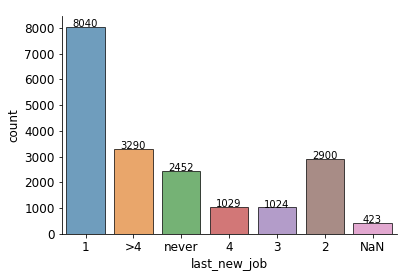

In [424]:
sns.countplot(data=df.fillna('NaN'), x='last_new_job', alpha=0.7, edgecolor='black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=10)
plt.show()

In [425]:
df[df['last_new_job'].isna()]['experience'].value_counts(dropna=False)

3      58
4      53
<1     38
2      37
5      34
>20    33
1      32
NaN    24
6      22
7      15
9      15
8      12
10      8
16      8
12      6
11      5
19      5
13      5
18      4
14      4
15      2
17      2
20      1
Name: experience, dtype: int64

Candidates having `<1` year of `experience` are not likely to have `last_new_job`. So we will fill the `NaN` values with `never`

In [426]:
df[(df['last_new_job'].isna()) & (df['experience']=='<1')]['enrolled_university'].value_counts(dropna=False)

no_enrollment       16
Full time course    15
NaN                  4
Part time course     3
Name: enrolled_university, dtype: int64

Candidates having `<1` year of `experience` and currenty `enrolled_university` at `Full time course` are not likely to have `last_new_job`. So we will fill the `NaN` values with `never`

In [427]:
nan_index=(df[(df['last_new_job'].isna()) & ((df['experience']=='<1') & (df['enrolled_university']=='Full time course'))]).index
df['last_new_job'][nan_index]='never'

In [428]:
print('Current missing value:', df['last_new_job'].isna().sum())
df[(df['last_new_job'].isna()) & (df['experience']=='<1')]['enrolled_university'].value_counts(dropna=False)

Current missing value: 408


no_enrollment       16
NaN                  4
Part time course     3
Name: enrolled_university, dtype: int64

`<1` year of `experience` and `Full time course` candidates successfully changed to `never`.

In [429]:
df[(df['last_new_job'].isna())&(df['experience']=='<1')]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1200,17357,city_160,0.920,NaN,No relevent experience,no_enrollment,Primary School,No Major,<1,NaN,NaN,NaN,166,0.0
1492,12362,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,<1,10000+,Pvt Ltd,NaN,28,1.0
2200,2731,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,<1,10000+,Pvt Ltd,NaN,38,1.0
5786,1596,city_103,0.920,NaN,No relevent experience,no_enrollment,Graduate,Other,<1,50-99,Pvt Ltd,NaN,180,0.0
5886,12496,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,<1,10/49,NaN,NaN,12,1.0
6112,19433,city_21,0.624,Female,Has relevent experience,NaN,Graduate,STEM,<1,500-999,NaN,NaN,79,1.0
6690,25046,city_21,0.624,NaN,Has relevent experience,NaN,Graduate,STEM,<1,10/49,NaN,NaN,8,1.0
6991,20777,city_143,0.740,NaN,No relevent experience,no_enrollment,Graduate,STEM,<1,NaN,NaN,NaN,88,1.0
7621,18861,city_24,0.698,NaN,No relevent experience,no_enrollment,No Education,No Major,<1,NaN,NaN,NaN,17,0.0
7847,18397,city_90,0.698,NaN,No relevent experience,NaN,Graduate,STEM,<1,<10,NaN,NaN,55,1.0


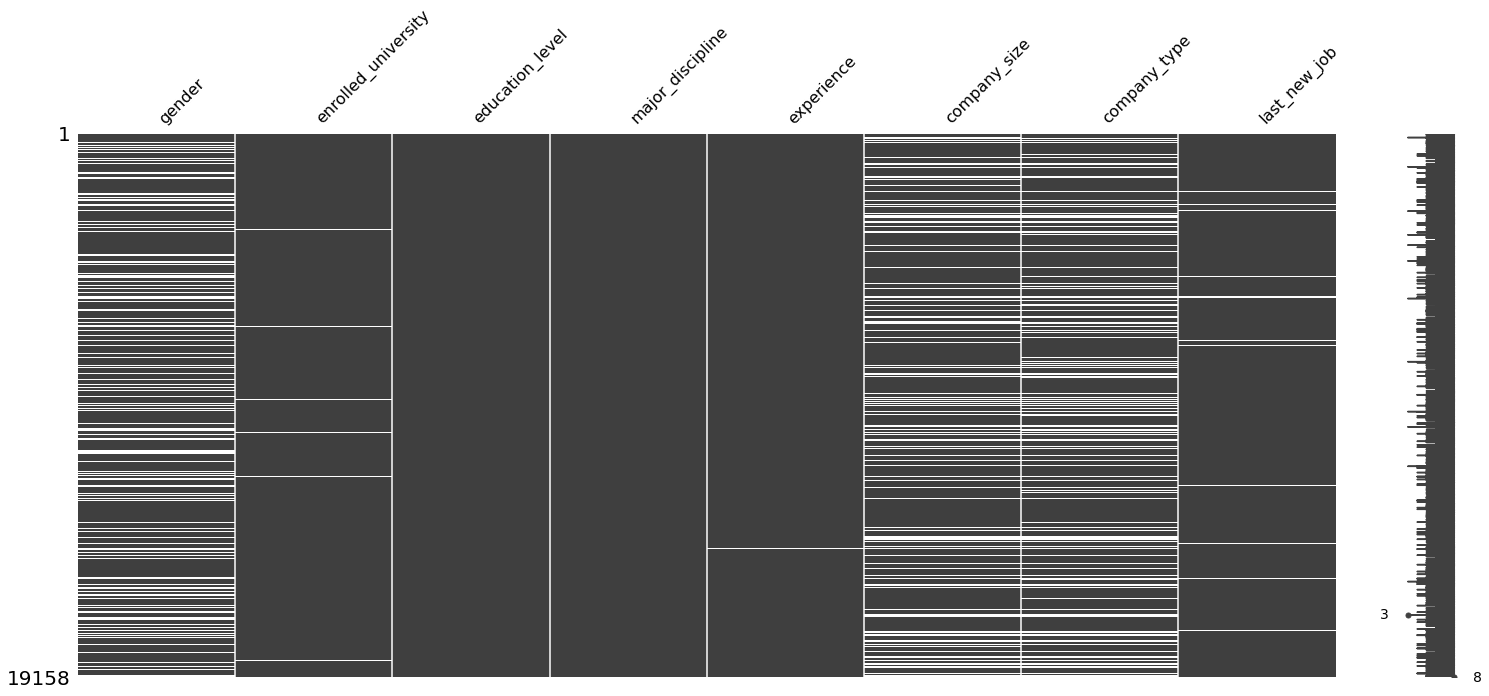

In [430]:
# Generate preview of entries with null values after evaluation
if df.isna().any(axis=None):
    missingno.matrix(df[df_nan[df_nan[0]>0].index])
    plt.show()

Dataset still have missing values after we filling based on other features. For Missing values that still in dataset, we try to fill with mode and constant

In [431]:
# Fill the rest of NaN values with simpleimputer
imputer_modus=SimpleImputer(strategy="most_frequent")
df[["enrolled_university","experience","last_new_job"]]=imputer_modus.fit_transform(df[["enrolled_university","experience","last_new_job"]])

imputer_cons=SimpleImputer(strategy="constant",fill_value="Not provided")
df[["gender","company_size","company_type"]]=imputer_cons.fit_transform(df[["gender","company_size","company_type"]])

## Data Inconsistency

In [432]:
# Make data more neat to read
df['enrolled_university'] = df['enrolled_university'].replace('no_enrollment', 'No enrollment')

In [433]:
# Correctiong punctuation
df['company_size'] = df['company_size'].replace('10/49','10-49')

## Feature Engineering

**Encoding**  
* One hot encoder : gender, company_type, major_discipline, enrolled_university
* Ordinal encoder : relevent_experience, education_level, experience, company_size, last_new_job   

In [434]:
# Ordinal Mapping Dictionary

le = LabelEncoder()
le.fit(df['city'])

ordinal_mapping = [
    {'col':'relevent_experience',
    'mapping':{
        'Has relevent experience': 1,
        'No relevent experience': 0
    }},
    {'col':'education_level',
    'mapping':{
        'Primary School' : 0,
        'Graduate'       : 2,
        'Masters'        : 3, 
        'High School'    : 1, 
        'Phd'            : 4
    }},
    {'col':'experience',
    'mapping':{
        '<1'      :    0,
        '1'       :    1, 
        '2'       :    2, 
        '3'       :    3, 
        '4'       :    4, 
        '5'       :    5,
        '6'       :    6,
        '7'       :    7,
        '8'       :    8, 
        '9'       :    9, 
        '10'      :    10, 
        '11'      :    11,
        '12'      :    12,
        '13'      :    13, 
        '14'      :    14, 
        '15'      :    15, 
        '16'      :    16,
        '17'      :    17,
        '18'      :    18,
        '19'      :    19, 
        '20'      :    20, 
        '>20'     :    21
    }},
    {'col':'company_size',
    'mapping':{
        'Not provided' : 0,
        '<10'          : 1,
        '10-49'        : 2, 
        '50-99'        : 3,
        '100-500'      : 4, 
        '500-999'      : 5, 
        '1000-4999'    : 6, 
        '5000-9999'    : 7,
        '10000+'       : 8      
    }},
    {'col':'last_new_job',
    'mapping':{
        'never'        :    0,
        '1'            :    1, 
        '2'            :    2, 
        '3'            :    3, 
        '4'            :    4, 
        '>4'           :    5
    }},
    {'col':'city',
    'mapping':dict(zip(le.classes_, range(len(le.classes_))))
    }
]

In [435]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['gender', 'company_type', 'major_discipline', 'enrolled_university']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['city','relevent_experience', 'education_level', 'experience', 'company_size', 'last_new_job'])
], remainder='passthrough')

In [436]:
transformer_cat = ColumnTransformer([
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['city','relevent_experience', 'education_level', 'experience', 'company_size', 'last_new_job'])
], remainder='passthrough')

# Model Selection

We will try several models:
* Logistic Regression
* KNN 
* Decision Tree
* Random Forest
* XGBoost
* Catboost

feature : 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'  
target : 'target'

In [437]:
x = df.drop(columns=['enrollee_id','target'])
y = df['target']

## Splitting Data

In [438]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=.2,random_state=2020)

## Model Benchmarking

In [439]:
# Model variables
logreg = LogisticRegression(max_iter=100, random_state=2020)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(max_depth=3, random_state=2020)
rf = RandomForestClassifier(random_state=2020)
xgb = XGBClassifier()

# Catboost model
x_train_ord = pd.DataFrame(transformer_cat.fit_transform(x_train),columns=transformer_cat.get_feature_names())
x_test_ord = pd.DataFrame(transformer_cat.fit_transform(x_test),columns=transformer_cat.get_feature_names())

CAT_FEATURES = ['company_type', 'enrolled_university',"gender","major_discipline"] #list of your categorical features
catboost_model = CatBoostClassifier(n_estimators=100,
                                   cat_features = CAT_FEATURES,verbose=False)

In [440]:
catboost_model.fit(x_train_ord,y_train)
catboost_model.predict(x_test_ord)

array([0., 1., 0., ..., 0., 0., 0.])

### Model Benchmarking: Data train

In [441]:
models = [logreg,knn,dt,rf,xgb,'catboost_model']
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    if i == 'catboost_model':
        model_cv=cross_val_score(catboost_model,x_train_ord,y_train,cv=skfold,scoring='roc_auc')
    else:
        estimator=Pipeline([
            ('preprocess',transformer),
            ('model',i)])
        model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','Catboost'],'mean':rata,'sdev':std}).set_index('model').sort_values(by='mean',ascending=False)

[14:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,mean,sdev
model,,
Catboost,0.801711,0.006790
Random Forest,0.787213,0.004913
XGBoost,0.786255,0.006613
Decision Tree,0.776202,0.005953
Logistic Regression,0.735357,0.010405
KNN,0.683943,0.006101


### Model Benchmarking: Data test

In [442]:
models = [logreg,knn,dt,rf,xgb,'catboost_model']
score = []

def y_pred_func(i):
    if i == 'catboost_model':
        estimator = catboost_model
        x_train2,x_test2 = x_train_ord,x_test_ord
    else:
        estimator=Pipeline([
            ('preprocess',transformer),
            ('model',i)])
        x_train2,x_test2 = x_train,x_test
    
    estimator.fit(x_train2,y_train)
    return(estimator,estimator.predict(x_test2),x_test2)

for i in models:
    estimator,y_pred,x_test2 = y_pred_func(i)
    if i != 'catboost_model':
        y_predict_proba = estimator.predict_proba(x_test2)[:,1]
    else:
        y_predict_proba = y_pred
    score.append(roc_auc_score(y_test,y_predict_proba))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','Catboost'],
             'roc auc score':score}).set_index('model').sort_values(by='roc auc score',ascending=False)

[14:15:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,roc auc score
model,
XGBoost,0.788660
Random Forest,0.786373
Decision Tree,0.774033
Logistic Regression,0.740299
Catboost,0.705863
KNN,0.691039


In [443]:
models = [logreg,knn,dt,rf,xgb,'catboost_model']
score = []

for i in models:
    estimator,y_pred,x_test2 = y_pred_func(i)
    if i == 'catboost_model':
        y_pred = np.where(y_pred>0.5,1,0) 
    score.append(matthews_corrcoef(y_test, y_pred))

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','Catboost'],
         'MCC':score}).set_index('model').sort_values(by='MCC',ascending=False)

[14:15:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,MCC
model,
Catboost,0.419800
XGBoost,0.398507
Random Forest,0.386891
Decision Tree,0.349853
KNN,0.257243
Logistic Regression,0.235795


### Performance Comparison: Data train & Data test

In [272]:
from sklearn.metrics import confusion_matrix

def confusion_matrix_table(y_test,y_pred):
    cf = confusion_matrix(y_test, y_pred)
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf.flatten()]

    names =  ['TN', 'FP', 'FN','TP']
    perc = ["{0:.2%}".format(value) for value in
                         cf.flatten()/np.sum(cf)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
              zip(names, perc, group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    
    return cf,labels

[14:10:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


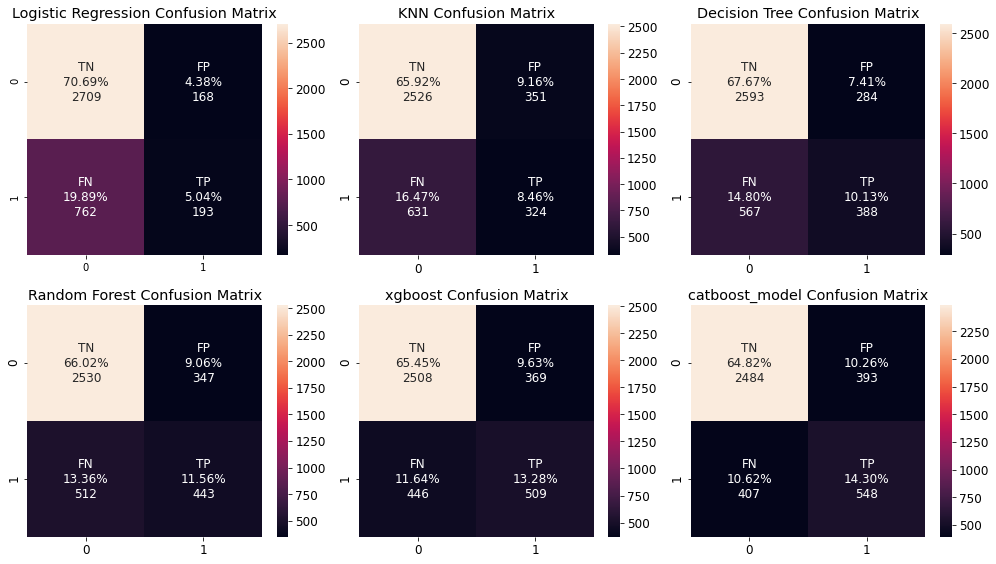

In [273]:
count = 0
models = [logreg,knn,dt,rf,xgb,'catboost_model']
fig = plt.figure(figsize=(14,8))

for i,j in zip(models,['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest','xgboost','catboost_model']):
    
    estimator,y_pred,x_test2 = y_pred_func(i)
    if i == 'catboost_model':
        y_pred = np.where(y_pred>0.5,1,0) 

    count += 1
    cf,labels = confusion_matrix_table(y_test,y_pred)
    ax= plt.subplot(2,3,count)

    plt.rcParams.update({'font.size': 12})
    sns.heatmap(cf, annot=labels, fmt='').set_title(f"{j} Confusion Matrix")
    fig.tight_layout()

In [274]:
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest','XGBoost','Catboost'],
              'Mean Score ROC Data Train':rata,
             'MCC Score Data Test':score}).set_index('model').sort_values(by='Mean Score ROC Data Train',ascending=False)

,Mean Score ROC Data Train,MCC Score Data Test
model,,
Catboost,0.801473,0.439394
XGBoost,0.786468,0.416562
Random Forest,0.784624,0.367033
Decision Tree,0.776202,0.349853
Logistic Regression,0.732787,0.212788
KNN,0.683055,0.246702


**Catboost gives best performances based on Data train and Data test**

In [275]:
catboost_model.fit(x_train_ord, y_train, 
                   eval_set = (x_test_ord, y_test),
                   use_best_model = True,
                   verbose=False)

y_pred = catboost_model.predict(x_test_ord)
y_pred = np.where(y_pred>0.5,1,0)
roc_auc_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      2877
         1.0       0.58      0.55      0.57       955

    accuracy                           0.79      3832
   macro avg       0.72      0.71      0.72      3832
weighted avg       0.79      0.79      0.79      3832



## Imbalance data handling

In [162]:
from sklearn.utils.class_weight import compute_class_weight

In [163]:
x_train_ord = pd.DataFrame(transformer_cat.fit_transform(x_train),columns=transformer_cat.get_feature_names())
x_test_ord = pd.DataFrame(transformer_cat.fit_transform(x_test),columns=transformer_cat.get_feature_names())

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

CAT_FEATURES = ['gender', 'company_type', 'major_discipline', 'enrolled_university'] #list of your categorical features
catboost_model = CatBoostClassifier(n_estimators=100,
                                   cat_features = CAT_FEATURES, 
                                    verbose=False,
                                   class_weights=class_weights)

catboost_model.fit(x_train_ord, y_train)
model_cv=cross_val_score(catboost_model,x_train_ord,y_train,cv=skfold,scoring='roc_auc')
model_cv.mean()

0.8014421866154139

In [164]:
cv_score = []

# Resampling methods variable
nearmiss=NearMiss()
smote = SMOTE(random_state=2020)
model= catboost_model

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

for i in [nearmiss,smote,class_weights]:
    estimator= Pipeline([
        ('preprocess', transformer),
        ('resampling', i),
        ('model',model)
    ])
    skfold= StratifiedKFold(n_splits=5)
    model_cv=cross_val_score(estimator, x_train, y_train, cv=skfold, scoring='roc_auc')
    cv_score.append(model_cv.mean())
    
    if i == class_weights:
        model_cv=cross_val_score(catboost_model,x_train_ord,y_train,cv=skfold,scoring='roc_auc')
    
    
    
    
# estimator= Pipeline([
#         ('preprocess', transformer),
#         ('model',catboost_model(class_weight='balanced'))
#     ])
# skfold= StratifiedKFold(n_splits=5)
# model_cv=cross_val_score(estimator, x_train, y_train, cv=skfold, scoring='roc_auc')
# cv_score.append(model_cv.mean())

TypeError: All intermediate steps of the chain should be estimators that implement fit and transform or fit_resample (but not both) or be a string 'passthrough' '{0.0: 0.6661161335187761, 1.0: 2.0049712192569333}' (type <class 'dict'>) doesn't)

In [ ]:
pd.DataFrame({'model':['Nearmiss','SMOTE','Class Weight'],
             'cv score':cv_score}).set_index('model').sort_values(by='cv score',ascending=False)

In [ ]:
pd.DataFrame({'model':['Nearmiss','SMOTE'],
             'cv score':cv_score}).set_index('model').sort_values(by='cv score',ascending=False)

In [ ]:
models = [nearmiss, smote]
score = []
count = 0
fig = plt.figure(figsize=(10,8))

for i,j in zip(models,['nearmiss', 'smote']):
    estimator= Pipeline([
        ('preprocess', transformer),
        ('resampling', i),
        ('model',model)
         ])
    estimator.fit(x_train,y_train)
    y_pred=estimator.predict(x_test)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score.append(roc_auc_score(y_test,y_predict_proba))
    print(i, roc_auc_score(y_test,y_predict_proba))
    
    count += 1
    cf,labels = confusion_matrix_table(y_test,y_pred)
    ax= plt.subplot(2,2,count)

    plt.rcParams.update({'font.size': 12})
    sns.heatmap(cf, annot=labels, fmt='').set_title(f"{j} Confusion Matrix")
    fig.tight_layout()
    
estimator= Pipeline([
        ('preprocess', transformer),
        ('model',RandomForestClassifier(class_weight='balanced'))
    ])
estimator.fit(x_train,y_train)
y_pred=estimator.predict(x_test)
y_predict_proba = estimator.predict_proba(x_test)[:,1]
score.append(roc_auc_score(y_test,y_predict_proba))

cf,labels = confusion_matrix_table(y_test,y_pred)
ax= plt.subplot(2,2,3)

plt.rcParams.update({'font.size': 12})
sns.heatmap(cf, annot=labels, fmt='').set_title('Classweight Confusion Matrix')
fig.tight_layout()


In [ ]:
pd.DataFrame({'model':['Nearmiss','SMOTE','Class Weight'],
             'cv score':cv_score,
             'roc auc score':score}).set_index('model').sort_values(by='cv score',ascending=False)

## Adjusting treshold

In [ ]:
x_train2,x_val,y_train2,y_val=train_test_split(x_train,y_train,stratify=y_train,test_size=.25,random_state=2020)

In [ ]:
y_prob=estimator.fit(x_train2,y_train2)
y_prob_val=estimator.predict_proba(x_val)[:,1]
y_pred=estimator.predict(x_val)

In [ ]:
plot_roc_curve(estimator,x_val,y_val)

In [ ]:
fpr,tpr,th= roc_curve(y_val,y_prob_val)

# roc_auc_score(y_test,y_pred)
df_treshold = pd.DataFrame({
    "fpr":fpr,
    "tpr":tpr,
    "th":th
})
df_treshold_filtered = df_treshold[(df_treshold['fpr']>=0.21) & (df_treshold['fpr']<=0.27)]
df_treshold_filtered['ratio'] = df_treshold_filtered['tpr']/df_treshold_filtered['fpr']
df_treshold_filtered.sort_values('ratio',ascending=False)

In [ ]:
sns.scatterplot(data=df_treshold_filtered, x='fpr', y='tpr')

In [ ]:
th1 = df_treshold_filtered.loc[105][2]
th1

In [ ]:
y_pred = np.where(y_predict_proba>th1,1,0)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_predict_proba))

# Model Tunning

In [ ]:
estimator.get_params()

In [ ]:
hyperparam_space={
    'model__n_estimators':[75],
    'model__max_features':['auto','sqrt','log2'],
    'model__max_depth':[None,2,4],
    'model__min_samples_split':[5,7,9,11],
    'model__min_samples_leaf':[2,3,4,7],
    'model__bootstrap':[True,False],
    'model__class_weight': ['balanced','balanced_subsample'],
    'model__criterion':['gini','entropy']
}

In [ ]:
skfold=StratifiedKFold(n_splits=5)
grid_search=GridSearchCV(
    estimator,
    param_grid=hyperparam_space,
    cv=skfold,
    scoring='roc_auc',
    n_jobs=-1
)

In [ ]:
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

In [ ]:
# Score after tunning
best_model=grid_search.best_estimator_
best_model.fit(x_train, y_train)
y_predict_proba = best_model.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test,y_predict_proba))

fig = plt.figure(figsize=(5,4))

y_pred = best_model.predict(x_test)

cf,labels = confusion_matrix_table(y_test,y_pred)

plt.figure(figsize=(10,10))
ax= plt.subplot(2,2,count)
plt.rcParams.update({'font.size': 12})
sns.heatmap(cf, annot=labels, fmt='').set_title(f"Confusion Matrix After Tunning")
fig.tight_layout()

After model tunning, test score increase from 0.783 to 0.796

In [ ]:
best_model=grid_search.best_estimator_
best_model.fit(x_train, y_train)
y_pred_tunning = best_model.predict(x_test)
print(classification_report(y_test,y_pred_tunning))

## Feature Selection

In [ ]:
x_train_preprocessed = transformer.fit_transform(x_train)
model = RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= None,
                            max_features= 'sqrt', min_samples_leaf= 7, min_samples_split= 9,
                            n_estimators= 75, class_weight='balanced')
rfe = RFE(model)

rfe.fit(x_train_preprocessed,y_train)
features_select=pd.DataFrame({'select':rfe.support_},index=estimator.named_steps["preprocess"].get_feature_names())
features_select[features_select['select']==True]

In [ ]:
x_test_preprocessed = transformer.transform(x_test)
x_train_select = pd.DataFrame(rfe.transform(x_train_preprocessed),columns=features_select[features_select['select']==True].index)
x_test_select = pd.DataFrame(rfe.transform(x_test_preprocessed),columns=features_select[features_select['select']==True].index)

model.fit(x_train_select,y_train)
y_predict_proba = model.predict_proba(x_test_select)[:,1]
print(roc_auc_score(y_test,y_predict_proba))

Setelah menggunakan RFE, didapat fitur-fitur yang dianggap paling penting. Kemudian dilakukan modeling menggunakan fitur tersebut didapat test score yang naik secara tidak signifikan dari 0.7976 ke 0.7991. Sehingga, diputuskan untuk menggunakan feature selection untuk memudahkan interpretasi data.

In [ ]:
feature_names = estimator.named_steps["preprocess"].get_feature_names()
coefs = best_model.named_steps["model"].feature_importances_
zipped = zip(feature_names, coefs)
df1 = pd.DataFrame(zipped, columns=["feature", "value"])
ax = df1.set_index('feature')['value'].sort_values().plot(kind='barh',figsize=(15,10))

In [ ]:
df1.sort_values(by='value',ascending=False).reset_index()

***
x0 : gender (11,13,14,22)  
x1 : company_type (7,9,15,16,18,19,25)  
x2 : major_discipline (10,12,17,20,21,23,24)



# Conclusion and Recommendation

In [ ]:
import shap
shap.initjs()

In [ ]:
x_train_preprocessed = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names())
x_test_preprocessed = pd.DataFrame(transformer.transform(x_test),columns=transformer.get_feature_names())

In [ ]:
explainer = shap.TreeExplainer(xgb)
chosen_instance = x_test_preprocessed.iloc[[0]]
shap_values = explainer.shap_values(chosen_instance)

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0], chosen_instance, matplotlib=True)